In [1]:
import os

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['font.size'] = 14

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
# shortcuts

join = os.path.join
norm = os.path.normpath

In [4]:
cwd = os.getcwd()

In [5]:
dynamic_path = norm(join(cwd, '../dynamic/runs/dynamic_stats.csv'))

In [16]:
df = pd.read_csv(dynamic_path, index_col=[0])
df.head()

,depth,end width,exp_rate,load,rmse,run time,run time fraction,sim time,start width
0,35,1,1.25,balanced,0.049461,207.351106,0.022068,1,1
1,35,2,1.25,balanced,0.049461,202.410782,0.021542,1,1
2,32,3,1.25,balanced,0.040467,220.059034,0.023420,1,1
3,30,4,1.25,balanced,0.036538,236.611530,0.025182,1,1
4,29,5,1.25,balanced,0.034500,265.228358,0.028227,1,1


In [18]:
df.columns

Index(['depth', 'end width', 'exp_rate', 'load', 'rmse', 'run time',
       'run time fraction', 'sim time', 'start width'],
      dtype='object')

In [49]:
mask_b1 = (df['load'] == 'balanced') & (df['sim time'] == 1)
mask_b5 = (df['load'] == 'balanced') & (df['sim time'] == 5)
mask_i1 = (df['load'] == 'imbalanced') & (df['sim time'] == 1)
mask_i5 = (df['load'] == 'imbalanced') & (df['sim time'] == 5)

mask_window = (df['rmse'] <= 0.05) & (df['run time'] <= 400)

plot_series = [df['exp_rate'] == 1.25,
               df['exp_rate'] == 1.5,
               df['exp_rate'] == 1.62,
               df['exp_rate'] == 1.75,
               df['exp_rate'] == 2.0,
               df['exp_rate'] == 2.25,
               df['exp_rate'] == 2.50,
               df['exp_rate'] == 2.75,
               df['exp_rate'] == 3.0]

label_series = ['1.25', '1.50', '1.62', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00']

markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', '*', 'h', 'x', '+']

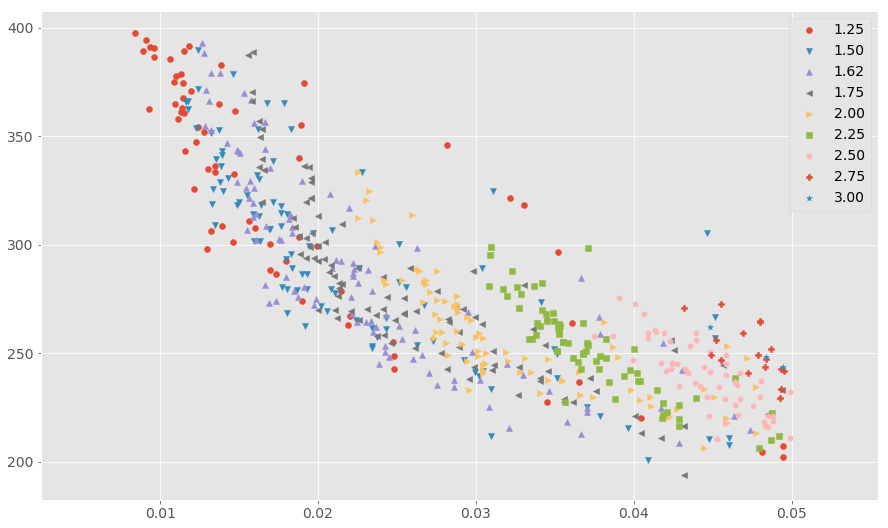

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for idx, s in enumerate(plot_series):
    l = label_series[idx]
    m = markers[idx]
    ax.scatter(df.loc[mask_b1 & mask_window & s]['rmse'], df.loc[mask_b1 & mask_window & s]['run time'], label=l, marker=m)

plt.legend()
plt.show()